**Experiment 12**

Using CNN for Image ClassificatioN

In [3]:
!pip install tensorflow
!pip install pydot


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\235hk\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\235hk\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, ReLU, Flatten, Dense
from keras.datasets import cifar10

Loading Cifar-10 dataset

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using ImageDataGenerator for Real-time data augmentation

In [6]:
img_gen = ImageDataGenerator(
    width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, rotation_range = 30, rescale = 1./255)
train_gen = img_gen.flow(x_train, y_train, batch_size = 32)
test_gen = img_gen.flow(x_test, y_test)

Building a CNN Model for Image Classification

In [7]:
model = models.Sequential()
# Todo
#Your input is of  32 x 32 x 3 dimensions
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1),padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(64, kernel_size=(3,3), strides=(1,1),padding='same', activation='relu', input_shape=(16,16,32)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(128, kernel_size=(3,3), strides=(1,1),padding='same', activation='relu', input_shape=(8,8,64)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(256, kernel_size=(3,3), strides=(1,1),padding='same', activation='relu', input_shape=(4,4,128)))
model.add(BatchNormalization())
model.add(ReLU())
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

steps_per_epoch = x_train.shape[0] // 32
r = model.fit(train_gen, steps_per_epoch=steps_per_epoch,
                    validation_data=test_gen, epochs = 20)

Epoch 1/20
1562/1562 [==============================] - 224s 143ms/step - loss: 1.4852 - accuracy: 0.0959 - val_loss: 1.3229 - val_accuracy: 0.1389
Epoch 2/20
1562/1562 [==============================] - 192s 123ms/step - loss: 1.1438 - accuracy: 0.0991 - val_loss: 1.1652 - val_accuracy: 0.0548
Epoch 3/20
1562/1562 [==============================] - 197s 126ms/step - loss: 1.0078 - accuracy: 0.1002 - val_loss: 1.1563 - val_accuracy: 0.1352
Epoch 4/20
1562/1562 [==============================] - 216s 138ms/step - loss: 0.9216 - accuracy: 0.1010 - val_loss: 1.0903 - val_accuracy: 0.1163
Epoch 5/20
1562/1562 [==============================] - 235s 150ms/step - loss: 0.8634 - accuracy: 0.1006 - val_loss: 1.0316 - val_accuracy: 0.1115
Epoch 6/20
1562/1562 [==============================] - 286s 183ms/step - loss: 0.8156 - accuracy: 0.1008 - val_loss: 0.8990 - val_accuracy: 0.0827
Epoch 7/20
1562/1562 [==============================] - 236s 151ms/step - loss: 0.7831 - accuracy: 0.1015 - val_

In [ ]:
model.evaluate(test_gen)

313/313 [==============================] - 7s 22ms/step - loss: 0.7684 - accuracy: 0.1086


[0.7683692574501038, 0.10859999805688858]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       2

In [ ]:
#Save your model
model.save('./PES2UG20CS130.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 16, 16, 64)       2

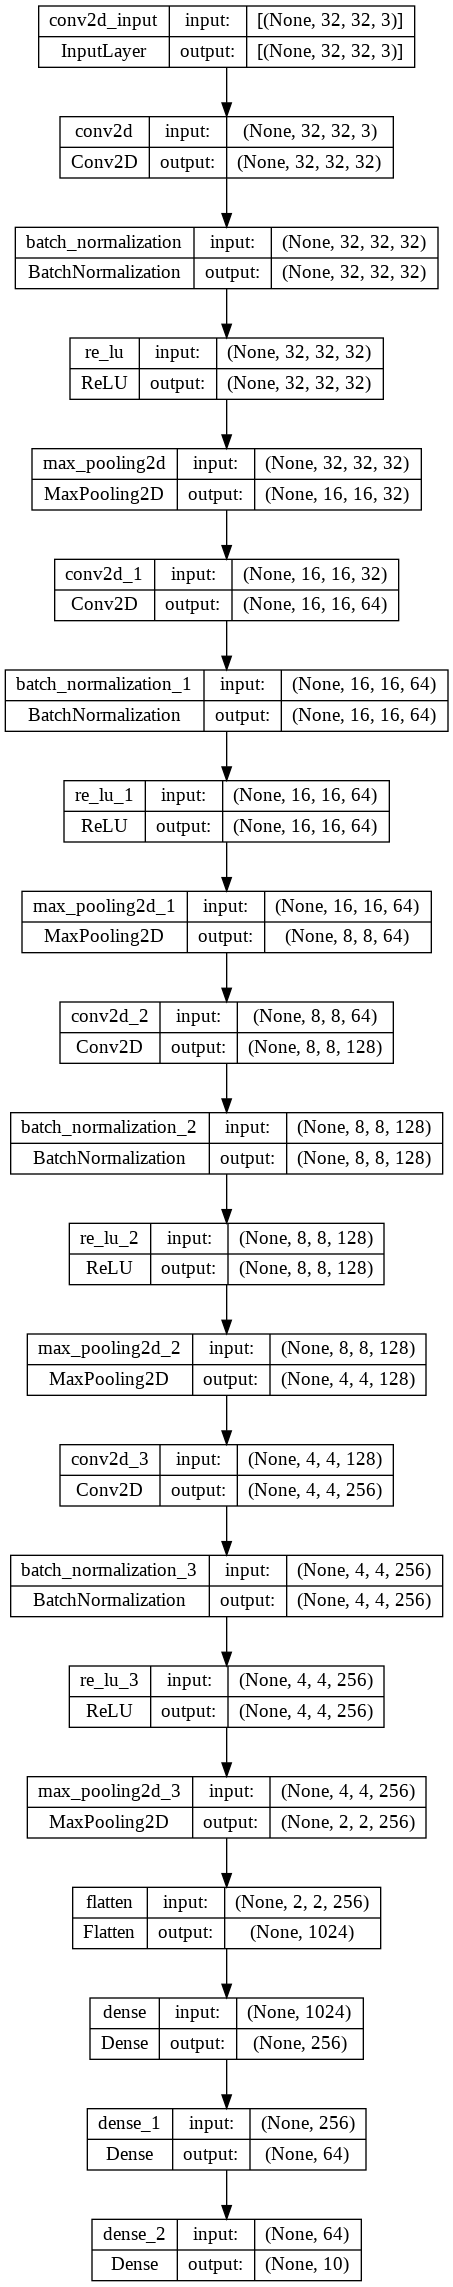

In [ ]:
#For your Verification Purposes:
model_n=tf.keras.models.load_model('./PES2UG20CS130.h5') # "SRN.h5"
model_n.summary()

#Verify your model using this i.e ,if the Image generated after this matches the Flow chart Image in PDF file then your output is most likely correct
tf.keras.utils.plot_model(model, to_file="my_model.png", show_shapes=True)